**Problem statement:**

The task at hand involves classifying images of cats and dogs using a Convolutional Neural Network (CNN). We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

**Objectives:**

**Data Preparation:**

● Download and extract the cats vs. dogs dataset.

● Organize the dataset into a structured directory format suitable for TensorFlow's ImageDataGenerator.

● Split the dataset into training and testing sets.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.auto import tqdm
import shutil

In [ ]:
!pip install kaggle

In [2]:
! mkdir -p /root/.kaggle
! mv /kaggle.json /root/.kaggle
import kaggle


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:37<00:00, 23.9MB/s]
100% 812M/812M [00:37<00:00, 22.9MB/s]


In [5]:
! unzip -q dogs-vs-cats.zip
! unzip -q train.zip

In [ ]:
# Image Data Generator
# images
#   |-cat
#       |-cat.1.jpg
#       |- ...
#   |-dog
#       |-dog.1.jpg
#       |- ...

In [6]:
# Create master and cateory folders
os.mkdir("images")
os.mkdir("images/dog")
os.mkdir("images/cat")
os.mkdir("test")

**Copy images from Train data to cat and dog folders.**

In [7]:
# transfer images from Train folder to images/cat & images/dog
source = "train/"
dest_cat = "images/cat/"
dest_dog = "images/dog/"

for imageName in tqdm(os.listdir(source)):
  if imageName.startswith("dog"):
    shutil.copy(source + imageName, dest_dog)
  elif imageName.startswith("cat"):
    shutil.copy(source + imageName, dest_cat)

  0%|          | 0/25000 [00:00<?, ?it/s]

**`The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).There are equal number of dog and cat images in the dataset.`**

In [8]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12500, 12500)

**Test data:**

Select random test data for train data , and move it into test folders.

In [9]:
# Test Data set
test_dog = np.random.choice(os.listdir(dest_dog), 500, replace=False)
test_cat = np.random.choice(os.listdir(dest_cat), 500, replace=False)

for imageName in test_dog:
  shutil.move(dest_dog + imageName, "test/")
for imageName in test_cat:
  shutil.move(dest_cat + imageName, "test/")

**After moving some random data from train to test folder.**

In [10]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12000, 12000)

In [11]:
len(os.listdir("test/"))

1000

**Organize the dataset into a structured directory format suitable for TensorFlow's ImageDataGenerator**

In [12]:
# Image Data Generator
idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                      rotation_range=30,
                                                      rescale=1/255.0,
                                                      validation_split=0.1)

**Data Augmentation and Preprocessing:**

● Implement data augmentation techniques to increase the diversity of the training dataset, aiding in the model's ability to generalize.

● Normalize the pixel values of the images for optimal model performance.

In [13]:
batch_size = 64

In [14]:
train_idg = idg.flow_from_directory("images", target_size=(150, 150),
                                    batch_size = batch_size,
                                    subset="training",)

Found 21600 images belonging to 2 classes.


In [15]:
val_idg = idg.flow_from_directory("images", target_size=(150, 150),
                                  batch_size = batch_size,
                                  subset="validation")

Found 2400 images belonging to 2 classes.


In [ ]:
# del model

**Model Building:**

● Construct a Convolutional Neural Network using TensorFlow and Keras.

● The model should contain multiple convolutional layers, pooling layers, and fully connected layers.


In [16]:
# Modelling -
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3), name="Input"))
# 1st chunk
model.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv1", ))
# (150, 150, 3), (3,3) --> (150 - 3 + 1)/1 = 148 = (148, 148, 16)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides =(2,2),
                                       padding="valid",
                                       name="Pool1"))
# 148 --> 74 ==> (74, 74, 16)
# 2nd Chunk
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv2"))
# (74, 74, 16) , (3,3) --> (74 - 3 + 1)/1 = 72 = (72, 72, 32)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool2"))
# (72, 72, 32) --> 36 = (36, 36, 32)
# 3rd Chunk
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv3"))
# (36, 36, 32), (3,3) --> 36 -3 + 1 = 34 = (34, 34, 32)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool3"))
# (34, 34, 32) --> (17, 17, 32)
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense1"))
model.add(tf.keras.layers.Dense(2, activation="softmax", name="Output"))

In [ ]:
#Original Image
150 * 150 * 3

67500

In [ ]:
# Conv Image
17 * 17 * 32

9248

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 16)      448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 32)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 32)        9248      
                                                                 
 Pool3 (MaxPooling2D)        (None, 17, 17, 32)        0         
                                                                 
 Flat (Flatten)              (None, 9248)              0

In [ ]:
# In Conv1 we have 16 filters and each filter as 9 (3x3) values
16 * 9

144

In [ ]:
# we will have filters for each channel
# 16 (no of filter) * 9 (value in each filter) * 3 (channels)
16 * 9 * 3

432

In [ ]:
# With each filter we have a bias
432 + 16

448

In [ ]:
# Conv2 = 32 * (3*3) * 16

In [ ]:
# Conv3 = 32 * (3*3) * 32

**Training:**

● Compile the model and train it on the prepared dataset.

● Utilize categorical cross entropy as the loss function and stochastic gradient descent as the optimizer.

● Train the model for a sufficient number of epochs to achieve good performance.

In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

**Evaluation:**

● Evaluate the model's performance on the validation set during training to monitor for overfitting.

● After training, assess the model's accuracy and make predictions on the test set.

In [20]:
model.fit(train_idg, epochs=10, batch_size=batch_size, validation_data=val_idg)

Epoch 1/10
338/338 [==============================] - 178s 514ms/step - loss: 0.6826 - acc: 0.5609 - val_loss: 0.6681 - val_acc: 0.6154
Epoch 2/10
338/338 [==============================] - 172s 510ms/step - loss: 0.6602 - acc: 0.6049 - val_loss: 0.6728 - val_acc: 0.5562
Epoch 3/10
338/338 [==============================] - 170s 503ms/step - loss: 0.6365 - acc: 0.6372 - val_loss: 0.6240 - val_acc: 0.6508
Epoch 4/10
338/338 [==============================] - 164s 486ms/step - loss: 0.6066 - acc: 0.6674 - val_loss: 0.5927 - val_acc: 0.6767
Epoch 5/10
338/338 [==============================] - 173s 513ms/step - loss: 0.5872 - acc: 0.6861 - val_loss: 0.5894 - val_acc: 0.6821
Epoch 6/10
338/338 [==============================] - 171s 507ms/step - loss: 0.5731 - acc: 0.6990 - val_loss: 0.5536 - val_acc: 0.7275
Epoch 7/10
338/338 [==============================] - 176s 521ms/step - loss: 0.5580 - acc: 0.7114 - val_loss: 0.5512 - val_acc: 0.7163
Epoch 8/10
338/338 [============================

In [23]:
test_image = "/content/test/dog.10000.jpg"
test_image


'/content/test/dog.10000.jpg'

(1, 150, 150, 3)

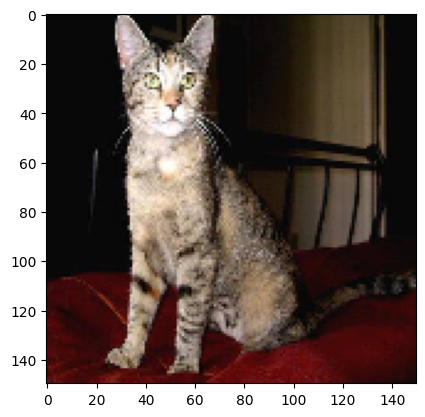

In [25]:
# Images in Test
test_image = "/content/test/cat.10000.jpg"
test_image = cv2.imread(test_image)
test_image = cv2.resize(test_image, (150, 150))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
test_image.shape

In [26]:
model.predict(test_image)

1/1 [==============================] - 0s 273ms/step


array([[0.802935  , 0.19706501]], dtype=float32)

In [27]:
train_idg.class_indices

{'cat': 0, 'dog': 1}

In [30]:
test_results = {}
for imageName in tqdm(os.listdir("/content/test/")):
  test_image = "/content/test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  result = model.predict(test_image)
  test_results[imageName] = result

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


In [31]:
test_results

{'cat.9980.jpg': array([[0.9102163 , 0.08978369]], dtype=float32),
 'dog.7533.jpg': array([[0.58341205, 0.4165879 ]], dtype=float32),
 'dog.3949.jpg': array([[0.09750564, 0.9024943 ]], dtype=float32),
 'cat.9360.jpg': array([[0.48424342, 0.5157566 ]], dtype=float32),
 'cat.4547.jpg': array([[0.783793  , 0.21620703]], dtype=float32),
 'cat.10937.jpg': array([[0.52218556, 0.4778144 ]], dtype=float32),
 'dog.10574.jpg': array([[0.7487023, 0.2512977]], dtype=float32),
 'dog.558.jpg': array([[0.5440536 , 0.45594642]], dtype=float32),
 'dog.303.jpg': array([[0.46139747, 0.53860253]], dtype=float32),
 'dog.2048.jpg': array([[0.6175072 , 0.38249284]], dtype=float32),
 'dog.8317.jpg': array([[0.01361621, 0.98638374]], dtype=float32),
 'cat.5293.jpg': array([[0.70916295, 0.290837  ]], dtype=float32),
 'dog.8388.jpg': array([[0.5700366, 0.4299634]], dtype=float32),
 'dog.11253.jpg': array([[0.13828018, 0.8617198 ]], dtype=float32),
 'dog.3625.jpg': array([[0.14212953, 0.8578705 ]], dtype=float32)

In [32]:
X_test = []
for imageName in tqdm(os.listdir("/content/test/")):
  test_image = "/content/test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  # test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  X_test.append(test_image)
X_test = np.array(X_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [33]:
X_test.shape

(1000, 150, 150, 3)

**Prediction:**

● Implement a system to make predictions on new images, categorizing them as either cat or dog.

● The system should be able to take an image (or a batch of images), preprocess it, and pass it through the model for prediction.

In [34]:
model.predict(X_test)

32/32 [==============================] - 1s 16ms/step


array([[0.9102163 , 0.08978369],
       [0.5834121 , 0.4165879 ],
       [0.09750563, 0.90249443],
       ...,
       [0.04974243, 0.9502576 ],
       [0.205022  , 0.794978  ],
       [0.65236664, 0.3476334 ]], dtype=float32)